# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


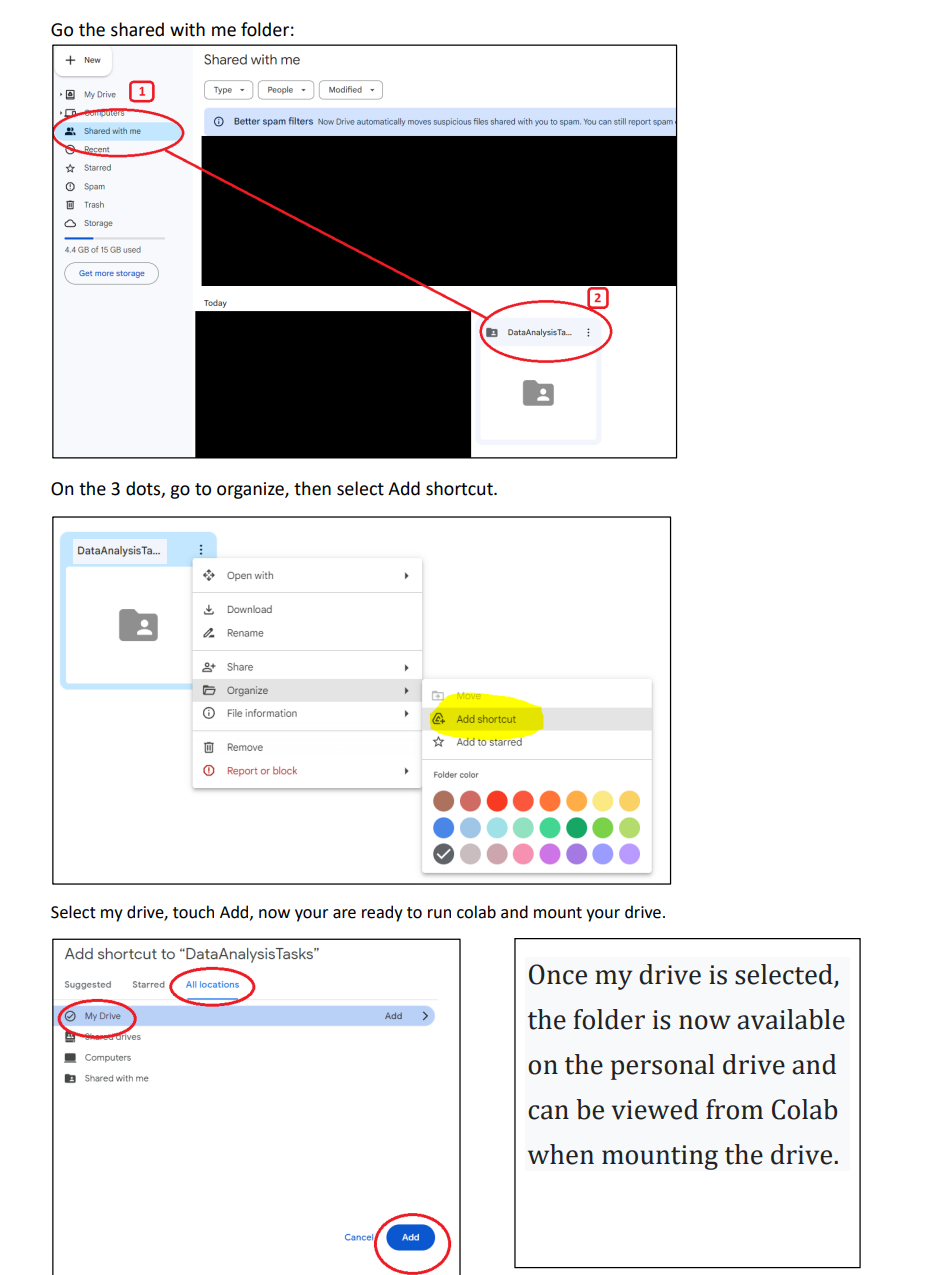

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/Automobile.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [ ]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








Prompt:
With this dataset UberDataset.csv
I need to make side-by-side bar plot of "start place location versus the miles travels per month" for the first quarter of the year.

For this i will give you some rules:


*   Drop the null values.
*   Also convert the columns start_date and end_date to the correct format * (datetime).
* Convert all columns to lowercase.
* Make the bars wider in a bar plot, and the figsize bigger for correct visualization of the data.



Please, comment the code, make the correct imports and fulfill the PEP8 rules.

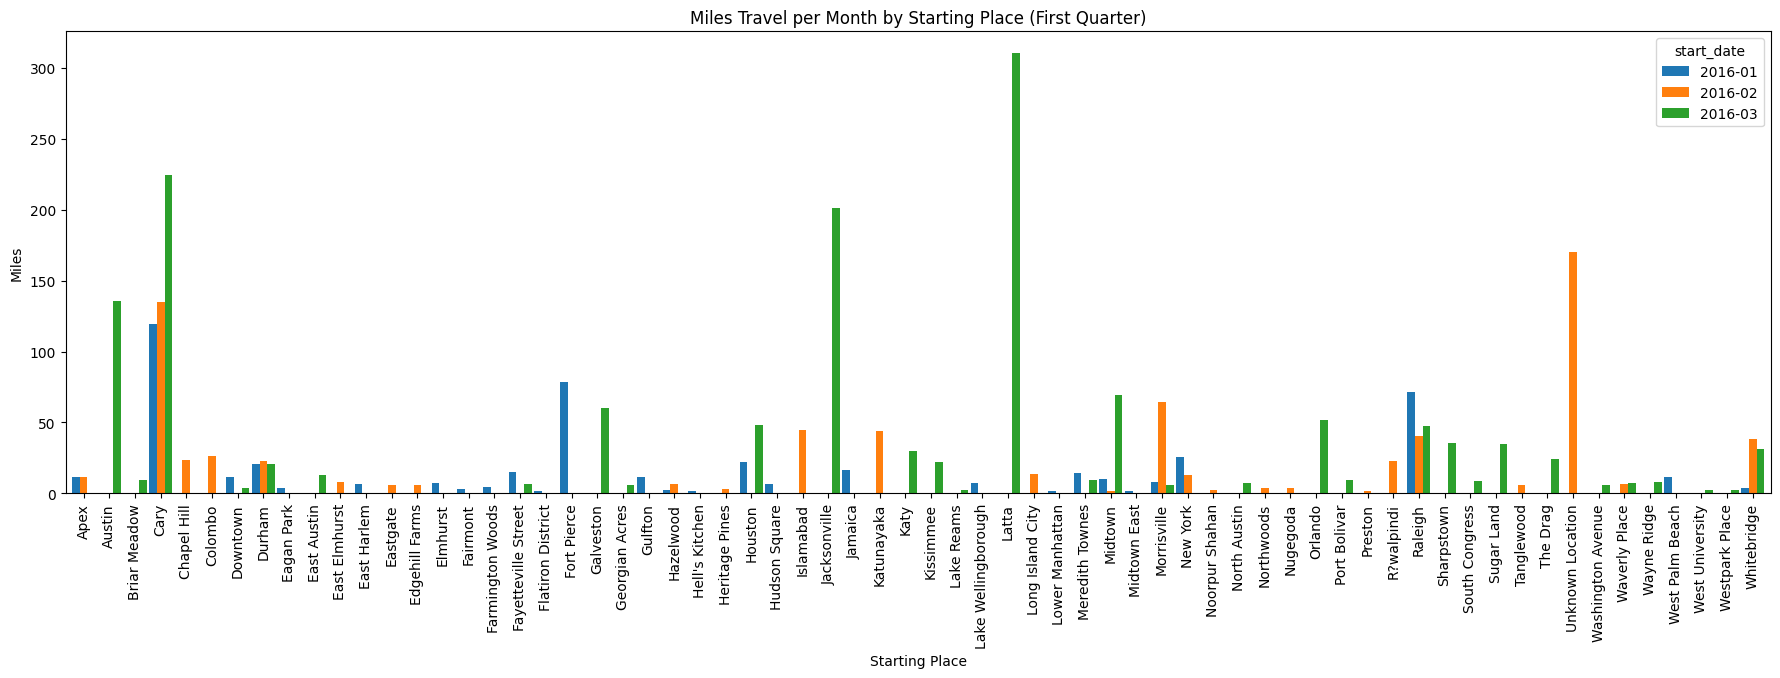

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load data from csv
df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/UberDataset.csv")
df.head()

## Data Cleaning

#Dropping the null values
df.dropna(inplace = True)
df.isnull().sum()

## Data Processing

# Converting dtype as datetime

df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

#Renaming the columns to lowercase
df.rename(columns={
    'START_DATE': 'start_date',
    'END_DATE': 'end_date',
    'CATEGORY': 'category',
    'START' : 'start',
    'STOP' : 'stop',
    'MILES' : 'miles',
    'PURPOSE' : 'purpose'
}, inplace=True)

# Filter rows where start_date is in the first quarter of the year
mask = (df['start_date'] >= '2016-01-01') & (df['start_date'] < '2016-04-01')
first_quarter_data = df.loc[mask]

# Group data by start and start_date and calculate sum of miles for each group
data = first_quarter_data.groupby([first_quarter_data['start'], first_quarter_data['start_date'].dt.to_period('M')])['miles'].sum()
# Reshape data to have one row for each start and one column for each month
data = data.unstack()

# Create a side-by-side bar plot of the data
data.plot(kind='bar', figsize=(22, 6),width=0.9)
plt.title('Miles Travel per Month by Starting Place (First Quarter)')
plt.xlabel('Starting Place')
plt.ylabel('Miles')
plt.show()